In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

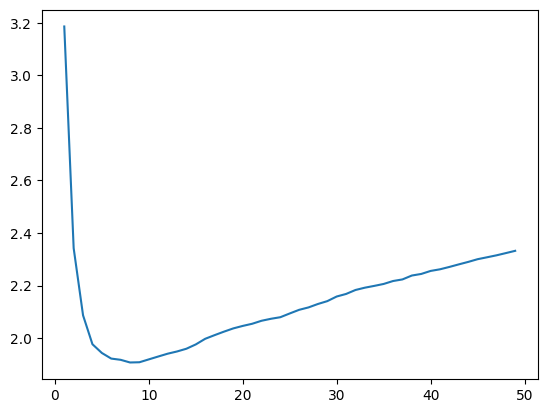

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

losses = []
k_values = list(range(1, 50))

for k in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    losses.append(mean_squared_error(y_test, y_pred))

plt.plot(k_values, losses)

In [6]:
k = k_values[np.argmin(losses)]
print(f'Best k: {k}')

Best k: 8


In [7]:
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 1.906939594972067
MAE: 1.012965549348231
R2: 0.9614913136387693
